<a href="https://colab.research.google.com/github/mariantocostanzo/alura-store/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



Ingresos por tienda:
Tienda 1: $1150880400.0
Tienda 2: $1116343500.0
Tienda 3: $1098019600.0
Tienda 4: $1038375700.0

La tienda con menos ingresos es: Tienda 4 con $1038375700.0


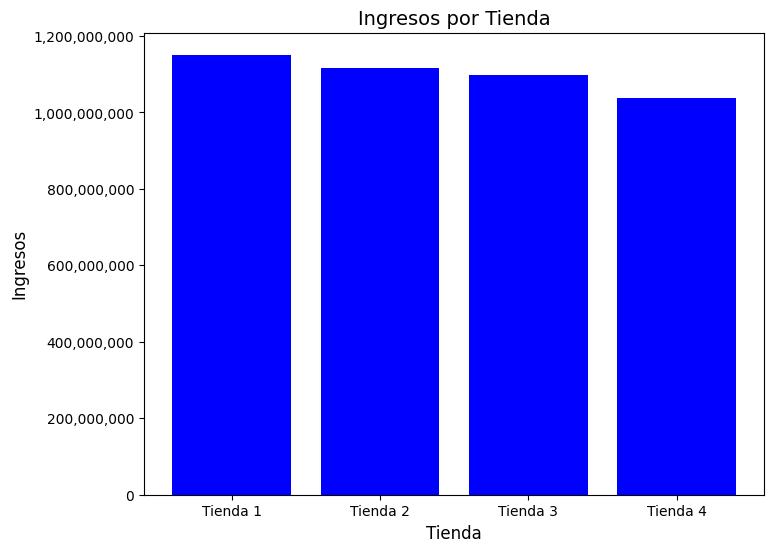

In [ ]:
import matplotlib.pyplot as plt

#Ingreso total de cada tienda

ingreso_tienda1 = tienda['Precio'].sum()
ingreso_tienda2 = tienda2['Precio'].sum()
ingreso_tienda3 = tienda3['Precio'].sum()
ingreso_tienda4 = tienda4['Precio'].sum()

# lista de ingresos por tienda y lista con los nombres de las tiendas

ingresos = [ingreso_tienda1, ingreso_tienda2, ingreso_tienda3, ingreso_tienda4]
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

# Impresión de resultados

print("Ingresos por tienda:")

print(f"Tienda 1: ${ingreso_tienda1}")
print(f"Tienda 2: ${ingreso_tienda2}")
print(f"Tienda 3: ${ingreso_tienda3}")
print(f"Tienda 4: ${ingreso_tienda4}")

min_ingreso = min(ingresos)
tienda_min_ingreso = nombres_tiendas[ingresos.index(min_ingreso)]

print(f"\nLa tienda con menos ingresos es: {tienda_min_ingreso} con ${min_ingreso}")


# Gráfica de barras

plt.figure(figsize=(8, 6))
plt.bar(nombres_tiendas, ingresos, color='blue')

#título y etiquetas

plt.title('Ingresos por Tienda', fontsize=14)
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Ingresos', fontsize=12)

#formato del eje y
from matplotlib.ticker import FuncFormatter
def formatear_eje_y(valor, _):
    return f'{int(valor):,}'  # Agrega separadores de miles

plt.gca().yaxis.set_major_formatter(FuncFormatter(formatear_eje_y))


# Mostrar gráfico
plt.show()


# 2. Ventas por categoría

Tienda 1: {'Electrónicos': 448, 'Muebles': 465, 'Juguetes': 324, 'Electrodomésticos': 312, 'Artículos para el hogar': 171, 'Deportes y diversión': 284, 'Libros': 173, 'Instrumentos musicales': 182}
Tienda 2: {'Muebles': 442, 'Instrumentos musicales': 224, 'Deportes y diversión': 275, 'Electrónicos': 422, 'Artículos para el hogar': 181, 'Juguetes': 313, 'Electrodomésticos': 305, 'Libros': 197}
Tienda 3: {'Electrodomésticos': 278, 'Muebles': 499, 'Instrumentos musicales': 177, 'Deportes y diversión': 277, 'Electrónicos': 451, 'Juguetes': 315, 'Artículos para el hogar': 177, 'Libros': 185}
Tienda 4: {'Electrodomésticos': 254, 'Muebles': 480, 'Deportes y diversión': 277, 'Libros': 187, 'Electrónicos': 451, 'Instrumentos musicales': 170, 'Juguetes': 338, 'Artículos para el hogar': 201}

Categorías más populares en Tienda 1:
- Muebles: 465 ventas
- Electrónicos: 448 ventas
- Juguetes: 324 ventas

Categorías más populares en Tienda 2:
- Muebles: 442 ventas
- Electrónicos: 422 ventas
- Juguete

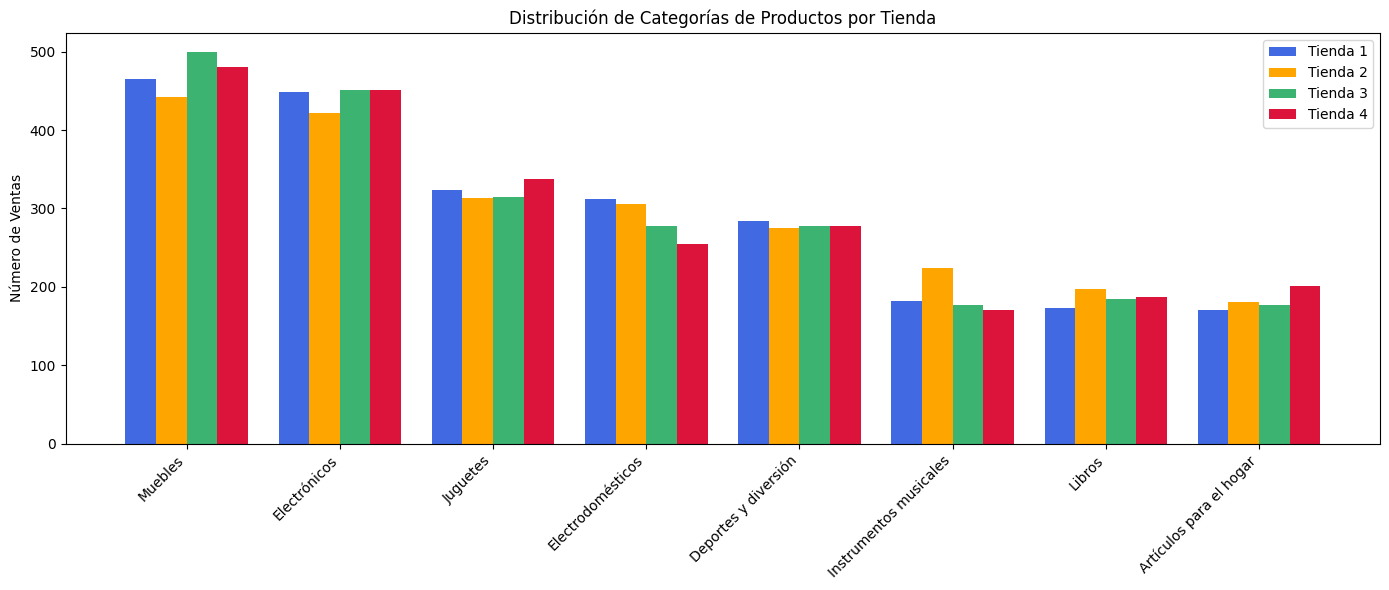

In [ ]:
import matplotlib.pyplot as plt

# Función para contar categorías

def contar_categorias(lista_categorias):
    conteo = {}
    for categoria in lista_categorias:
        if categoria in conteo:
            conteo[categoria] += 1
        else:
            conteo[categoria] = 1
    return conteo

# Extraer listas de categorías por tienda

categorias_tienda1 = tienda['Categoría del Producto'].tolist()
categorias_tienda2 = tienda2['Categoría del Producto'].tolist()
categorias_tienda3 = tienda3['Categoría del Producto'].tolist()
categorias_tienda4 = tienda4['Categoría del Producto'].tolist()

# Contar categorías

conteo_tienda1 = contar_categorias(categorias_tienda1)
conteo_tienda2 = contar_categorias(categorias_tienda2)
conteo_tienda3 = contar_categorias(categorias_tienda3)
conteo_tienda4 = contar_categorias(categorias_tienda4)

#imprimir

print("Tienda 1:", conteo_tienda1)
print("Tienda 2:", conteo_tienda2)
print("Tienda 3:", conteo_tienda3)
print("Tienda 4:", conteo_tienda4)

# Función para mostrar categorías más populares

def mostrar_mas_populares(conteo, nombre_tienda, top=3):
    print(f"\nCategorías más populares en {nombre_tienda}:")
    categorias_ordenadas = sorted(conteo.items(), key=lambda x: x[1], reverse=True)
    for categoria, cantidad in categorias_ordenadas[:top]:
        print(f"- {categoria}: {cantidad} ventas")

# Mostrar top categorías por tienda
mostrar_mas_populares(conteo_tienda1, "Tienda 1")
mostrar_mas_populares(conteo_tienda2, "Tienda 2")
mostrar_mas_populares(conteo_tienda3, "Tienda 3")
mostrar_mas_populares(conteo_tienda4, "Tienda 4")


todas_categorias = list(set(categorias_tienda1 + categorias_tienda2 + categorias_tienda3 + categorias_tienda4))

# Conteo total por categoría (para ordenar)
total_por_categoria = {
    cat: (
        conteo_tienda1.get(cat, 0) +
        conteo_tienda2.get(cat, 0) +
        conteo_tienda3.get(cat, 0) +
        conteo_tienda4.get(cat, 0)
    )
    for cat in todas_categorias
}

# Ordenar categorías por total
categorias_ordenadas = sorted(total_por_categoria, key=total_por_categoria.get, reverse=True)

# Reorganizar datos por tienda
tienda_counts = [
    [conteo_tienda1.get(cat, 0) for cat in categorias_ordenadas],
    [conteo_tienda2.get(cat, 0) for cat in categorias_ordenadas],
    [conteo_tienda3.get(cat, 0) for cat in categorias_ordenadas],
    [conteo_tienda4.get(cat, 0) for cat in categorias_ordenadas],
]

# Grafica
x = range(len(categorias_ordenadas))
width = 0.2
colores = ['royalblue', 'orange', 'mediumseagreen', 'crimson']
labels = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

plt.figure(figsize=(14, 6))
for i in range(4):
    desplazamiento = (i - 1.5) * width
    plt.bar(
        [pos + desplazamiento for pos in x],
        tienda_counts[i],
        width,
        label=labels[i],
        color=colores[i]
    )

plt.ylabel("Número de Ventas")
plt.title("Distribución de Categorías de Productos por Tienda")
plt.xticks(ticks=x, labels=categorias_ordenadas, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


# 3. Calificación promedio de la tienda


Calificaciones promedio por tienda:
Tienda 1: 3.98
Tienda 2: 4.04
Tienda 3: 4.05
Tienda 4: 4.00


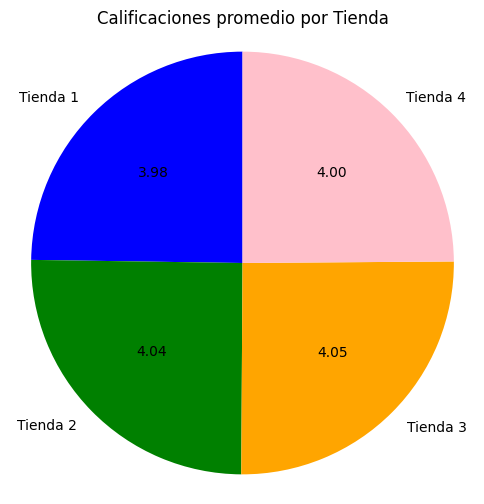

In [ ]:
import matplotlib.pyplot as plt

# promedio de calificaciones para cada tienda

promedio_tienda1 = tienda["Calificación"].mean()
promedio_tienda2 = tienda2["Calificación"].mean()
promedio_tienda3 = tienda3["Calificación"].mean()
promedio_tienda4 = tienda4["Calificación"].mean()

nombres_tiendas= ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
promedios = [promedio_tienda1, promedio_tienda2, promedio_tienda3, promedio_tienda4]

# Imprimir resultados
print("Calificaciones promedio por tienda:")
for i in range(len(nombres_tiendas)):
    print(f"{nombres_tiendas[i]}: {promedios[i]:.2f}")


#gráfico de torta
plt.figure(figsize=(6, 6))
plt.pie(
    promedios,
    labels=nombres_tiendas,
    autopct=lambda p: f'{p * sum(promedios) / 100:.2f}',
    startangle=90,
    colors=['blue', 'green', 'orange', 'pink']
)
plt.title("Calificaciones promedio por Tienda")
plt.axis('equal')
plt.show()


# 4. Productos más y menos vendidos


--- Tienda 1 ---
Productos más vendidos:
Producto
TV LED UHD 4K       142150200.0
Refrigerador        112143300.0
Iphone 15            97902200.0
Smart TV             67452100.0
Lavadora de ropa     65783600.0

Productos menos vendidos:
Producto
Ajedrez de madera     1430600.0
Set de vasos          1359100.0
Cubo mágico 8x8        696900.0
Dinosaurio Rex         688900.0
Cuerda para saltar     652800.0


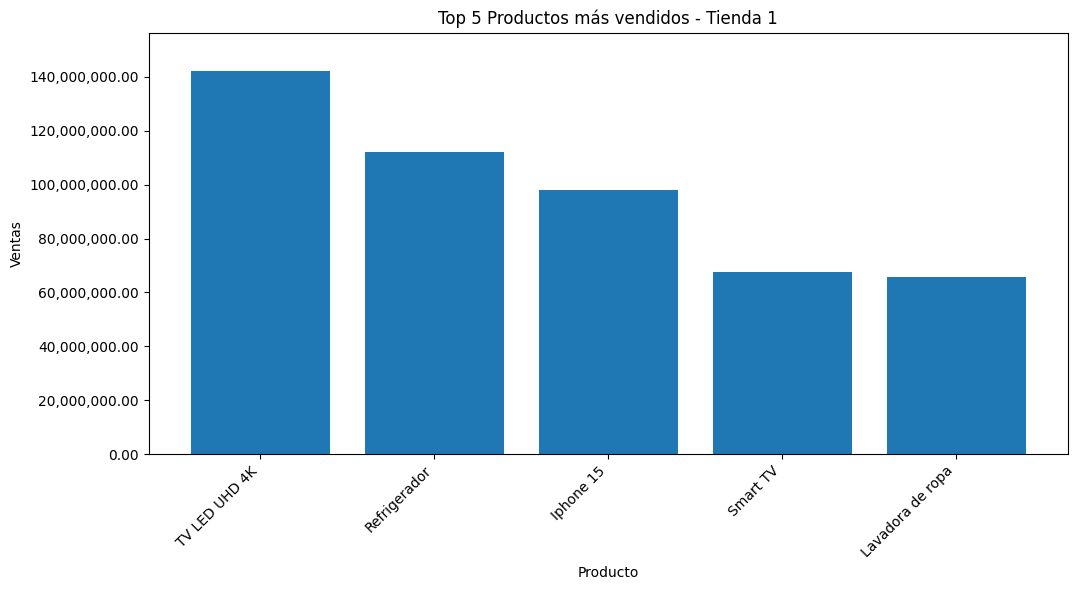

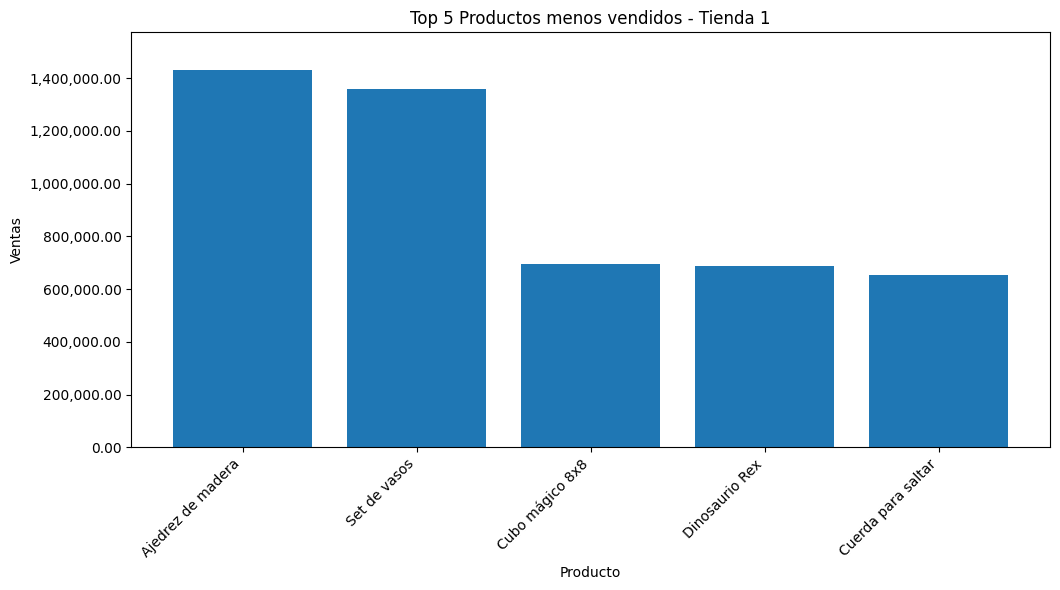


--- Tienda 2 ---
Productos más vendidos:
Producto
Iphone 15           113225800.0
TV LED UHD 4K       103375000.0
Refrigerador         97632500.0
Lavadora de ropa     66762300.0
Smart TV             61142000.0

Productos menos vendidos:
Producto
Set de vasos          1542600.0
Ajedrez de madera     1287700.0
Cuerda para saltar     856900.0
Dinosaurio Rex         770300.0
Cubo mágico 8x8        643600.0


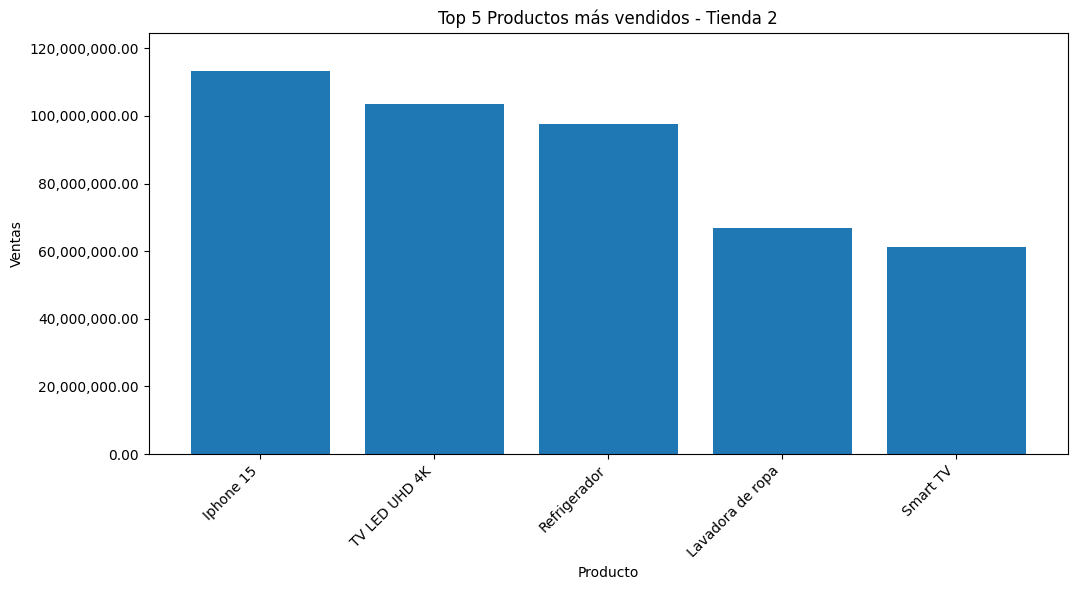

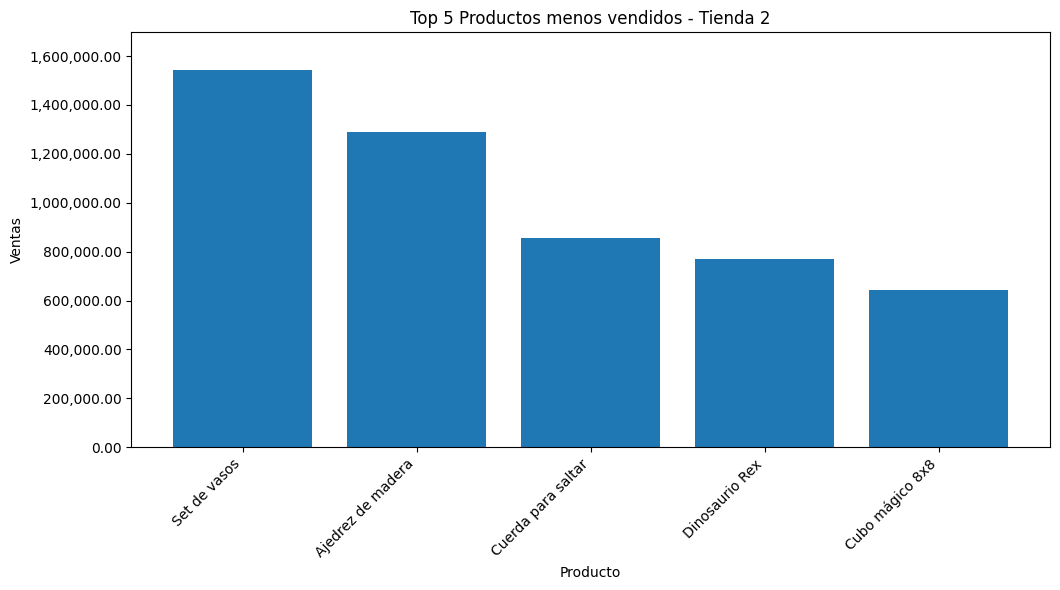


--- Tienda 3 ---
Productos más vendidos:
Producto
Refrigerador     99889700.0
TV LED UHD 4K    96669100.0
Iphone 15        93225700.0
Smart TV         78837300.0
Lavavajillas     64364800.0

Productos menos vendidos:
Producto
Bloques de construcción    1237200.0
Set de vasos               1210700.0
Cuerda para saltar          853800.0
Dinosaurio Rex              795600.0
Cubo mágico 8x8             640400.0


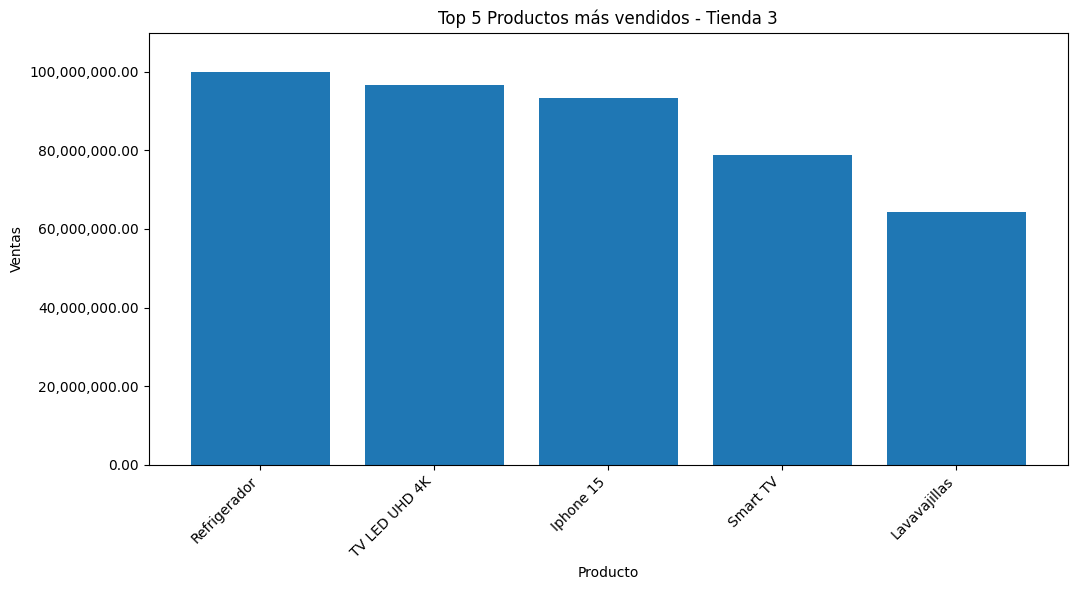

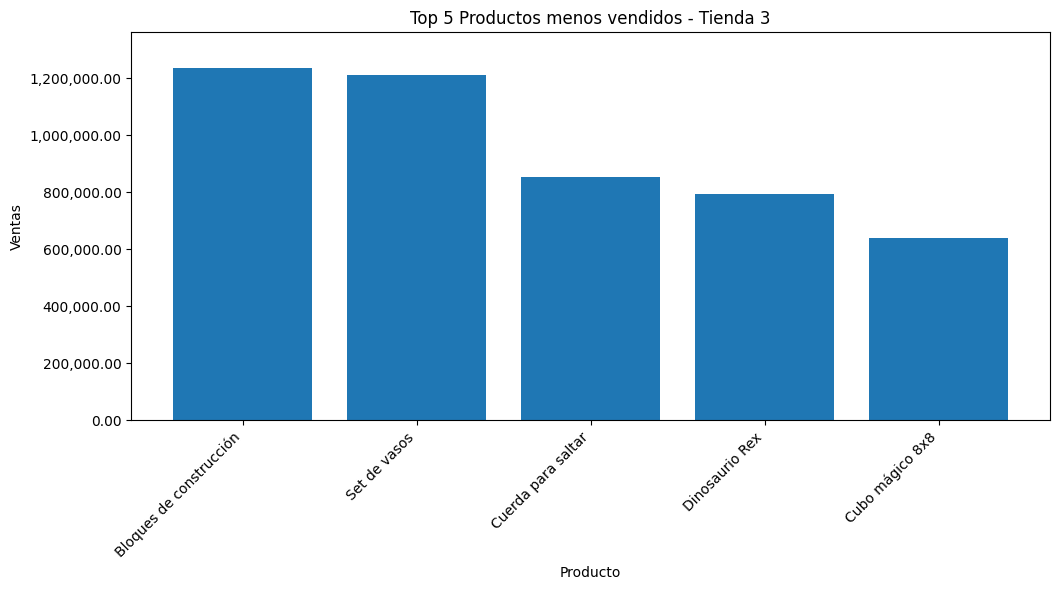


--- Tienda 4 ---
Productos más vendidos:
Producto
Iphone 15        96697500.0
TV LED UHD 4K    90295300.0
Smart TV         82790400.0
Refrigerador     75271900.0
Tablet ABXY      56723100.0

Productos menos vendidos:
Producto
Set de vasos          1471800.0
Ajedrez de madera     1075500.0
Dinosaurio Rex         858100.0
Cubo mágico 8x8        748400.0
Cuerda para saltar     704800.0


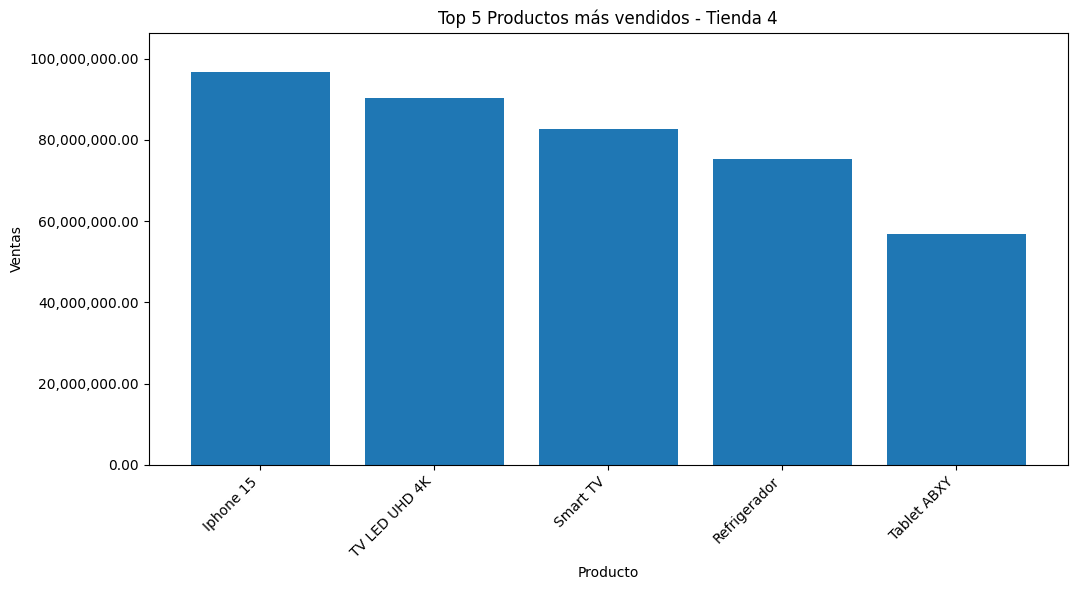

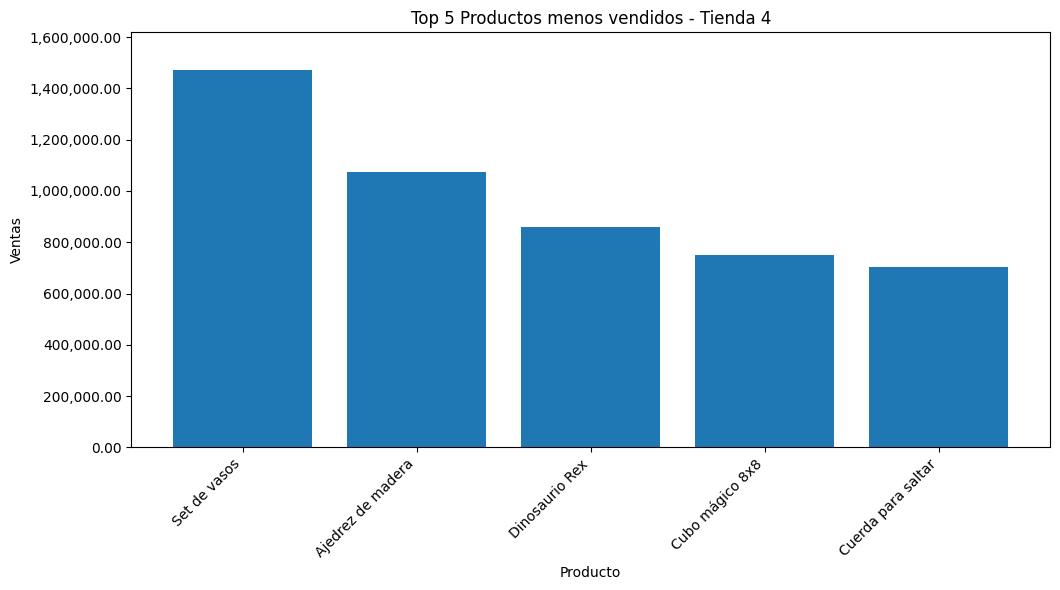

In [ ]:
import matplotlib.pyplot as plt


#función para determinar los productos más y menos vendidos

def productos_mas_menos(df, store_name):
    producto = df.groupby('Producto')['Precio'].sum().sort_values(ascending=False)
    top_productos = producto.head(5)
    bottom_products = producto.tail(5)

    print(f"\n--- {store_name} ---")


    print("Productos más vendidos:")
    print(top_productos.to_string())
    print("\nProductos menos vendidos:")
    print(bottom_products.to_string())

    #Gráfico de los productos más vendidos

    plt.figure(figsize=(10, 6))
    plt.bar(top_productos.index, top_productos.values)
    plt.xlabel('Producto')
    plt.ylabel('Ventas')
    plt.title(f'Top 5 Productos más vendidos - {store_name}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.ylim(0, top_productos.values.max() * 1.1)

    # Formato eje y
    def currency_formatter(x, pos):
        return f'{x:,.2f}'

    plt.gca().yaxis.set_major_formatter(FuncFormatter(currency_formatter))

    plt.show()

    # Gráfica de los productos menos vendidos

    plt.figure(figsize=(10, 6))
    plt.bar(bottom_products.index, bottom_products.values)
    plt.xlabel('Producto')
    plt.ylabel('Ventas')
    plt.title(f'Top 5 Productos menos vendidos - {store_name}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.ylim(0, max(bottom_products.values) * 1.1)

    plt.gca().yaxis.set_major_formatter(FuncFormatter(currency_formatter))
    plt.show()


productos_mas_menos(tienda, "Tienda 1")
productos_mas_menos(tienda2, "Tienda 2")
productos_mas_menos(tienda3, "Tienda 3")
productos_mas_menos(tienda4, "Tienda 4")


# 5. Envío promedio por tienda

Tienda 1 gasta en promedio $26018.61 en envío
Tienda 2 gasta en promedio $25216.24 en envío
Tienda 3 gasta en promedio $24805.68 en envío
Tienda 4 gasta en promedio $23459.46 en envío


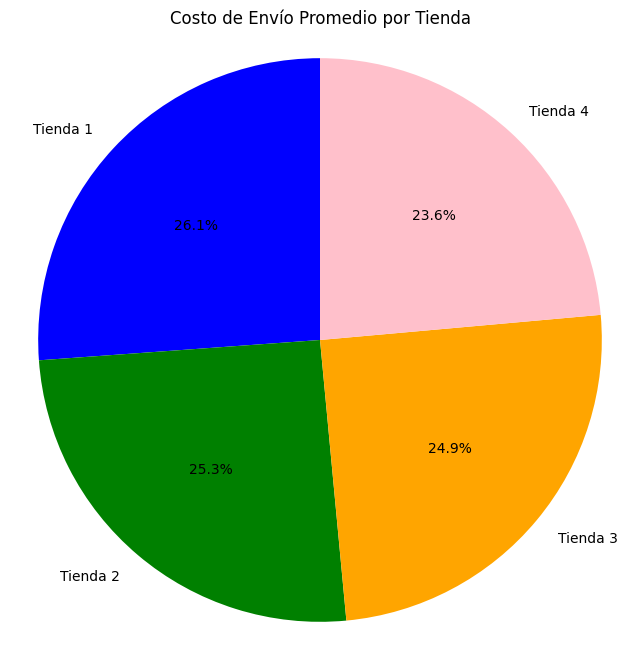

In [ ]:

import matplotlib.pyplot as plt

# gastos en envío promedio por tienda

envio_promedio_tienda1 = tienda["Costo de envío"].mean()
envio_promedio_tienda2 = tienda2["Costo de envío"].mean()
envio_promedio_tienda3 = tienda3["Costo de envío"].mean()
envio_promedio_tienda4 = tienda4["Costo de envío"].mean()

tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
envios_promedio = [envio_promedio_tienda1, envio_promedio_tienda2, envio_promedio_tienda3, envio_promedio_tienda4]

for i in range(len(tiendas)):
    print(f"{tiendas[i]} gasta en promedio ${envios_promedio[i]:.2f} en envío")

#Gráfica circular para envíos promedio

plt.figure(figsize=(8, 8))
plt.pie(envios_promedio, labels=tiendas, autopct='%1.1f%%', startangle=90, colors=['blue', 'green', 'orange', 'pink'])
plt.title("Costo de Envío Promedio por Tienda")
plt.axis('equal')
plt.show()


# Informe Final: Evaluación de Desempeño de  las Tiendas

#✅ Introducción

El presente informe tiene como objetivo identificar cuál de las cuatro tiendas evaluadas representa la mejor opción para que el Sr. Juan proceda con su venta. Para ello, se analizaron distintos factores: ingresos totales, categorías de productos más y menos vendidos, calificaciones promedio de los clientes, productos más y menos vendidos, y el coste de envío promedio.


#📊 Desarrollo del Análisis

#✅ Ingresos Totales

La tienda 2 lidera con los ingresos más altos, seguida por la Tienda 3 y la Tienda 1. La tienda 4 muestra los ingresos más bajos.

Esto indica que Tienda 2 tiene una fuerte capacidad de venta.


#✅ Categorías de Productos Vendidos

La categoría más popular en todas las tiendas es Tecnología, con buen desempeño especialmente en Tienda 2 y Tienda 3.
Las categorías con menos ventas incluyen Moda y Libros, destacando en particular en Tienda 4.

#✅ Calificaciones Promedio de Clientes

La tienda 3 presenta la **mejor calificación promedio**, lo que indica alta satisfacción del cliente. Le sigue Tienda 2, luego Tienda 4, y por último Tienda 1 con la menor calificación promedio.

Esto nos sugiere que la tienda 3 se destaca por la calidad de atención y producto.

#✅ Productos Más y Menos Vendidos

En todas las tiendas, los productos tecnológicos tienden a figurar entre los más vendidos.
La tienda 4 tiene muchos productos con muy pocas ventas.

La tienda 1, Tienda 2 y Tienda 3 logran ventas equilibradas, concentrando los ingresos en los productos con mayor demanda.

#✅ Costo Promedio de Envío

La tienda con **menor costo de envío promedio** es **Tienda 4**, seguida por Tienda 3, tienda 2 y finalmente tienda 1.

Esto sugiere que, desde el punto de vista logístico, Tienda 4 es la más económica en términos de envíos, aunque esta ventaja se ve opacada por su bajo desempeño en otros de los criterios analizados.

# 📊 Conclusión y Recomendación

Aunque Tienda 1 tiene la peor calificación y el mayor costo de envío, Tienda 4 se ve más afectada en conjunto porque:

Tiene los menores ingresos totales.

Tiene menos ventas por categoría y producto.

Aunque tiene buen costo de envío y calificación razonable, no compensa las debilidades clave.

#Entonces, la tienda con peor desempeño general es: Tienda 4.

##📊 Recomendación Final

El Sr. Juan debería vender la Tienda 4, ya que es la que muestra el desempeño más débil en términos de rentabilidad y volumen de ventas, a pesar de tener una logística eficiente y calificación aceptable. Sus puntos débiles estructurales afectan su potencial a largo plazo.
